#  Homework week 10
## MBIO612
### Gabrielle Martineau

In [14]:
#Set working directory
setwd("~/U_of_H/FALL_2021/MBIO612/Week_10")

#download necessary libraries
library(tidyverse)
library(dplyr)
library(MASS)
install.packages ("FactoMineR")
install.packages("devtools")
install.packages("factoextra")
library ("FactoMineR")
library("factoextra")
library("devtools")



Installing package into 'C:/Users/Martine/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'FactoMineR' is in use and will not be installed"Installing package into 'C:/Users/Martine/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'cli', 'rcmdcheck'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
cli        2.5.0  3.1.0              TRUE
rcmdcheck  1.3.3  1.4.0             FALSE
devtools   2.4.1  2.4.2             FALSE

  Binaries will be installed
package 'cli' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Martine\AppData\Local\Temp\RtmpADPH17\downloaded_packages


installing the source packages 'rcmdcheck', 'devtools'

Warning message in install.packages("devtools"):
"installation of package 'rcmdcheck' had non-zero exit status"Warning message in install.packages("devtools"):
"installation of package 'devtools' had non-zero exit status"Installing package into 'C:/Users/Martine/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Martine\AppData\Local\Temp\RtmpADPH17\downloaded_packages


Warning message:
"package 'factoextra' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


ERROR: Error in library("devtools"): there is no package called 'devtools'


In [9]:
#create 4 variables with the mvnorm function 
## create the variance covariance matrix
sigma<-rbind(c(1,0.4,0, 0),  c(0.4, 1, 0, 0),c(0,0, 1,0.95), c(0,0,0.95,1))
      
# create the mean vector
mu<-c(10, 10, 10,10)

# generate the multivariate normal distribution
WXYZ <-as.data.frame(mvrnorm(n=20, mu=mu, Sigma=sigma))
colnames(WXYZ)= c("W_variable", "X_variable", "Y_variable", "Z_variable")      

#Double check correlations
cor(WXYZ)

,W_variable,X_variable,Y_variable,Z_variable
W_variable,1.0000000,0.40401393,-0.23276714,-0.1603194
X_variable,0.4040139,1.00000000,0.04957226,0.0532440
Y_variable,-0.2327671,0.04957226,1.00000000,0.9541798
Z_variable,-0.1603194,0.05324400,0.95417975,1.0000000


In [10]:
#create the outcome: linear regression
B0=2
B1=1.2
B2= 1.5
B3= 1.7
B4= 3
W=WXYZ$W_variable
X=WXYZ$X_variable
Y=WXYZ$Y_variable
Z=WXYZ$Z_variable


outcome=(B0+ B1*W+ B2*X + B3*Y + B4*Z)


#add column outcome to data_frame
WXYZ_v2 <- mutate(WXYZ, model = outcome)

In [11]:
#compute linear regression
lm_outcome = lm (outcome ~ W_variable+X_variable+Y_variable+ Z_variable ,data = WXYZ)
summary(lm_outcome)

Warning message in summary.lm(lm_outcome):
"essentially perfect fit: summary may be unreliable"


Call:
lm(formula = outcome ~ W_variable + X_variable + Y_variable + 
    Z_variable, data = WXYZ)

Residuals:
       Min         1Q     Median         3Q        Max 
-8.450e-15 -2.820e-15 -5.769e-16  2.252e-15  8.991e-15 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 2.000e+00  2.348e-14 8.519e+13   <2e-16 ***
W_variable  1.200e+00  1.298e-15 9.243e+14   <2e-16 ***
X_variable  1.500e+00  2.139e-15 7.011e+14   <2e-16 ***
Y_variable  1.700e+00  4.238e-15 4.012e+14   <2e-16 ***
Z_variable  3.000e+00  3.818e-15 7.858e+14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.34e-15 on 15 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 4.401e+30 on 4 and 15 DF,  p-value: < 2.2e-16


When we model the outcome using a standard linear regression with no interaction,  we get the exact same results as the parameter estimation.

In [12]:
#use PCA to reduce dimentionality of data set
res_pca = prcomp(WXYZ, scale=TRUE)
summary (res_pca)

Importance of components:
                          PC1    PC2    PC3    PC4
Standard deviation     1.4250 1.1718 0.7442 0.2059
Proportion of Variance 0.5077 0.3433 0.1384 0.0106
Cumulative Proportion  0.5077 0.8509 0.9894 1.0000

To compute a PCA, we do not need a response variable (outcome), since every variable corresponds to its own independant axis. 

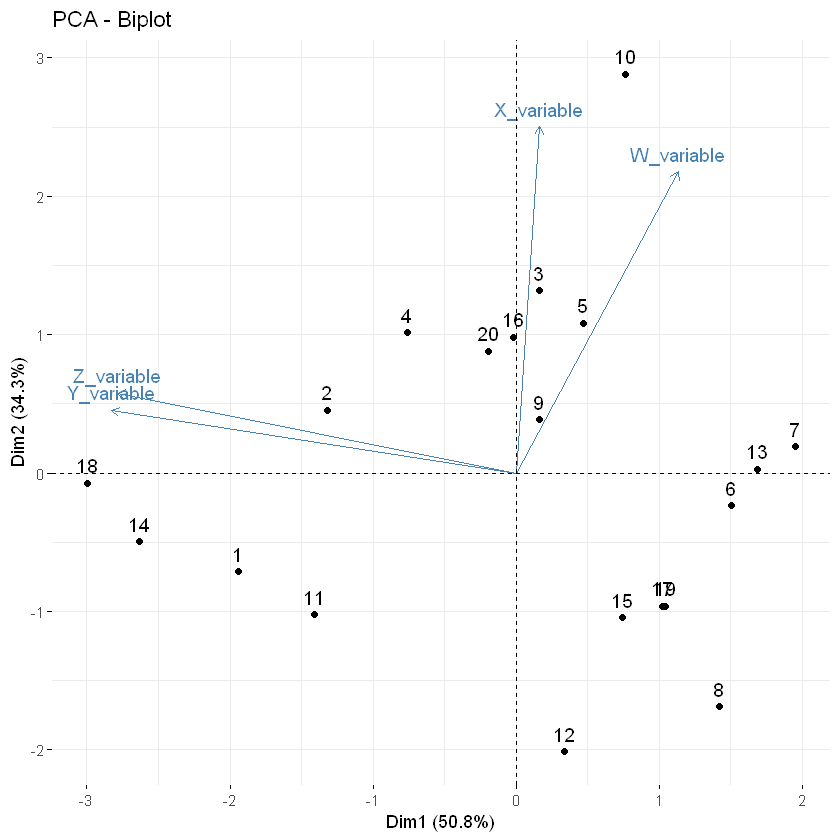

In [16]:
#How efficient is the new lower-dimensional space representation at predicting the outcome?
fviz_pca_biplot(res_pca)

Here, the first principal component captures 51% of the variance in the data, while the second one can explain about 34% of it. Since the angles between the blue lines approximate the correlation, we notice that variable Y and Z are highly correlated, that W and Z are mildly correlated and that X and Y are orthogonal, which corresponds to the initial model paramters.


Sorry, I haven't provided an in-depth interpretation of what is going on, I feel like I would need to understand the math for that and wasn't too sure about the questions